In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import os
%matplotlib inline

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
path = r'/Users/tayen/Documents/CF/Advanced Analytics Dashboard Design'

In [4]:
purchase = pd.read_pickle(os.path.join(path,'02 data','Processed Data','purchase_ga_session.pickle'))

In [20]:
# check data
purchase.describe().round()

,visitID,date,visits,hits,pageviews,transactions,transactionRevenue,totalTransactionRevenue,hitNumber,time,hour,minute,transactionTax,transactionShipping,fullVisitorId,productRevenue,productPrice,productQuantity
count,3.656900e+04,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,36569.0,25485.0,36444.0,3.656900e+04,36569.0,36569.0,36569.0
mean,1.485732e+09,20166160.0,1.0,56.0,42.0,1.0,262.0,367.0,50.0,1298838.0,13.0,30.0,23.0,23.0,4.546630e+18,47.0,17.0,6.0
std,9.534125e+06,4701.0,0.0,55.0,43.0,1.0,883.0,1746.0,43.0,1127418.0,5.0,17.0,32.0,51.0,3.052707e+18,160.0,19.0,26.0
min,1.470046e+09,20160801.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,7.0,2.131311e+14,1.0,1.0,1.0
25%,1.477504e+09,20161026.0,1.0,26.0,21.0,1.0,41.0,48.0,23.0,572676.0,9.0,16.0,9.0,10.0,1.759779e+18,12.0,4.0,1.0
50%,1.485448e+09,20170126.0,1.0,41.0,32.0,1.0,89.0,102.0,39.0,972824.0,12.0,30.0,13.0,13.0,4.512553e+18,20.0,13.0,1.0
75%,1.494032e+09,20170505.0,1.0,66.0,48.0,1.0,220.0,257.0,62.0,1650791.0,16.0,45.0,24.0,16.0,7.195505e+18,42.0,19.0,3.0
max,1.501652e+09,20170801.0,1.0,500.0,469.0,25.0,23130.0,47082.0,489.0,15046593.0,23.0,59.0,763.0,1139.0,9.998996e+18,9496.0,250.0,1000.0


In [5]:
purchase.shape

(36569, 47)

In [6]:
purchase.dtypes

visitID                      int64
date                         int64
visits                       int64
hits                         int64
pageviews                    int64
timeOnSite                  object
transactions                 int64
transactionRevenue         float64
totalTransactionRevenue    float64
source                      object
campaign                    object
medium                      object
keyword                     object
adNetworkType               object
browser                     object
operatingSystem             object
isMobile                      bool
continent                   object
subContinent                object
country                     object
hitNumber                    int64
isInteraction                 bool
time                         int64
hour                         int64
minute                       int64
pagePath                    object
hostname                    object
pageTitle                   object
transactionId       

## correlation coefficient among numerical data

In [7]:
# subset numerical data
purchase_numerical = purchase[['hits','pageviews','transactions', 'transactionRevenue', 'totalTransactionRevenue','productRevenue','productPrice','productQuantity','transactionTax','transactionShipping']]

In [8]:
purchase_numerical.dtypes

hits                         int64
pageviews                    int64
transactions                 int64
transactionRevenue         float64
totalTransactionRevenue    float64
productRevenue             float64
productPrice               float64
productQuantity              int64
transactionTax             float64
transactionShipping        float64
dtype: object

In [9]:
# Create a correlation matrix using pandas
purchase_numerical.corr()

,hits,pageviews,transactions,transactionRevenue,totalTransactionRevenue,productRevenue,productPrice,productQuantity,transactionTax,transactionShipping
hits,1.000000,0.980879,0.592392,0.116220,0.166905,0.002892,-0.011829,-0.005319,0.142805,0.168985
pageviews,0.980879,1.000000,0.665144,0.097474,0.164769,0.003188,0.002577,-0.006555,0.114997,0.179086
transactions,0.592392,0.665144,1.000000,0.011982,0.128182,0.019452,0.046781,0.002576,-0.018479,0.048871
transactionRevenue,0.116220,0.097474,0.011982,1.000000,0.827517,0.580679,0.015321,0.464738,0.959331,0.159309
totalTransactionRevenue,0.166905,0.164769,0.128182,0.827517,1.000000,0.542555,0.022096,0.386639,0.714202,0.140832
productRevenue,0.002892,0.003188,0.019452,0.580679,0.542555,1.000000,0.111722,0.586795,0.528078,0.163010
productPrice,-0.011829,0.002577,0.046781,0.015321,0.022096,0.111722,1.000000,-0.127487,0.023074,0.007458
productQuantity,-0.005319,-0.006555,0.002576,0.464738,0.386639,0.586795,-0.127487,1.000000,0.403682,0.163504
transactionTax,0.142805,0.114997,-0.018479,0.959331,0.714202,0.528078,0.023074,0.403682,1.000000,0.333801
transactionShipping,0.168985,0.179086,0.048871,0.159309,0.140832,0.163010,0.007458,0.163504,0.333801,1.000000


## Create correlation matrix

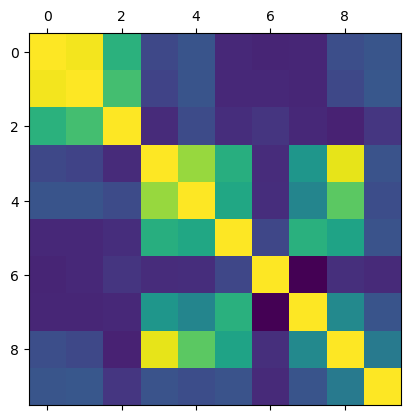

In [10]:
# Create a correlation heatmap using matplotlib
plt.matshow(purchase_numerical.corr())

Text(0.5, 1.0, 'Correlation Matrix')

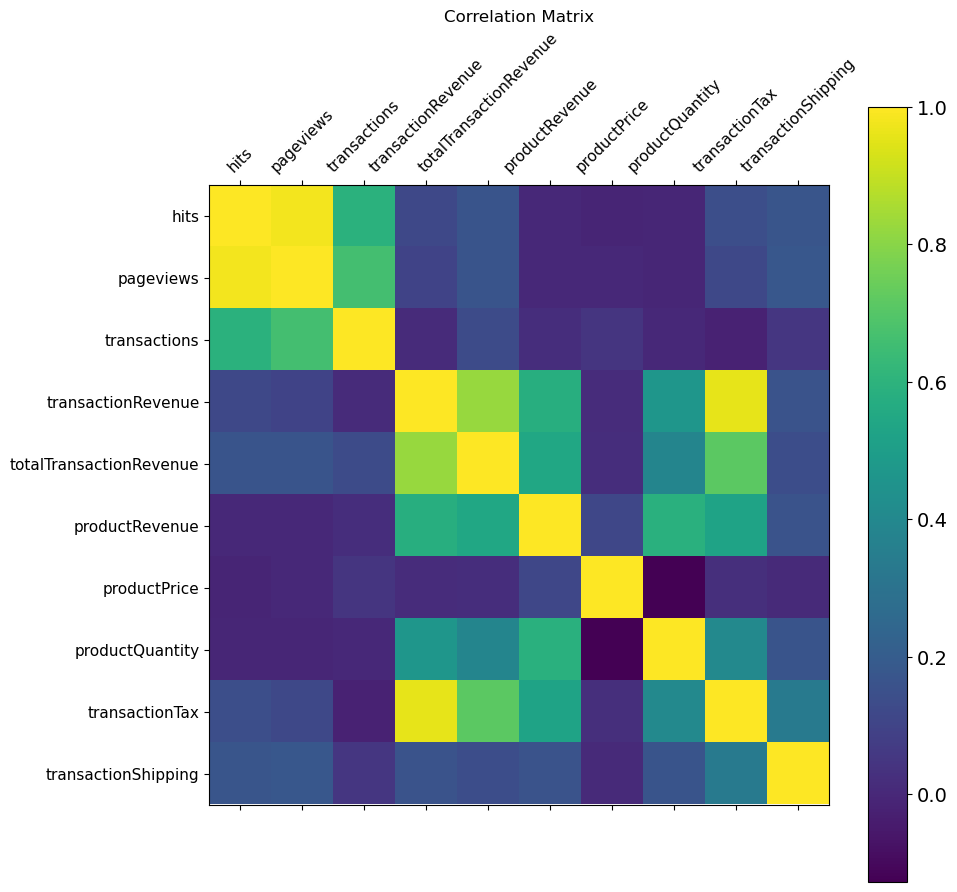

In [11]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10,10)) # figure size 
plt.matshow(purchase_numerical.corr(), fignum=f.number) # type of plot
plt.xticks(range(purchase_numerical.shape[1]), purchase_numerical.columns, fontsize=11, rotation=45) # x axis labels
plt.yticks(range(purchase_numerical.shape[1]), purchase_numerical.columns, fontsize=11) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=12) # add title

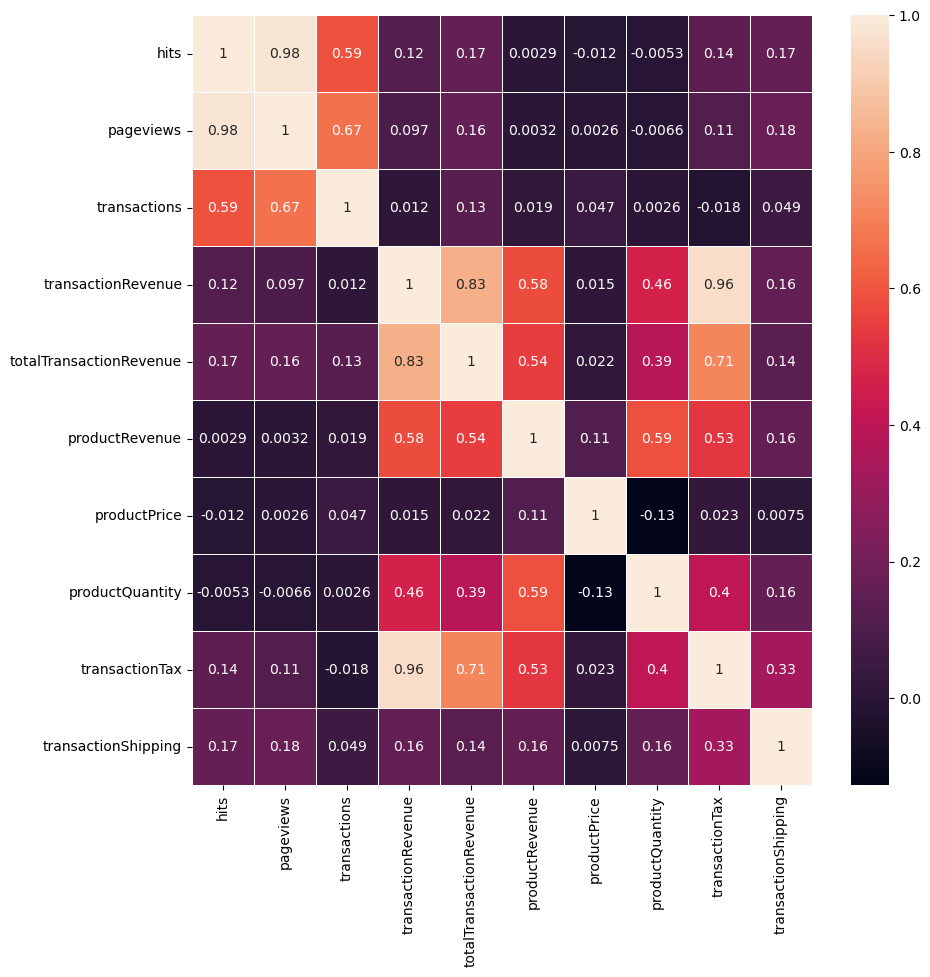

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(purchase_numerical.corr(), annot = True, ax = ax,linewidth=.5) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

## Explore strong correlation variables 

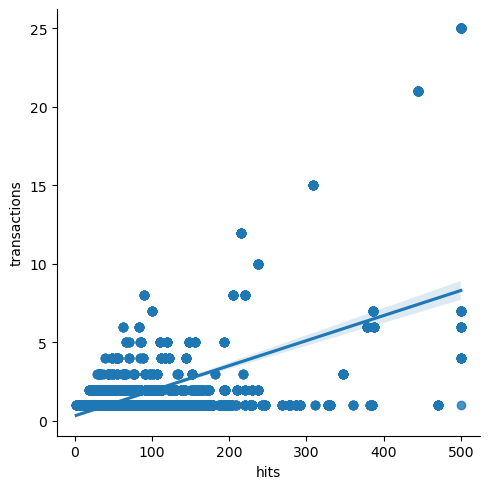

In [13]:
# scatter plot to delve deeper into the relations
sns.lmplot( x = 'hits', y = 'transactions', data = purchase_numerical)

### high number transactions tend to have high event hits

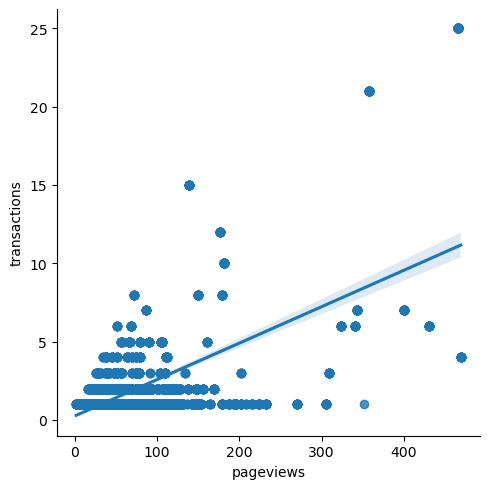

In [14]:
sns.lmplot( x = 'pageviews', y = 'transactions', data = purchase_numerical)

### high number transactions tend to view more pages

## Create pairplot

In [21]:
# create pairplot subset
pairplot_sub = purchase[['source','campaign','medium','keyword','adNetworkType','transactions','transactionRevenue','browser','operatingSystem','isMobile']]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

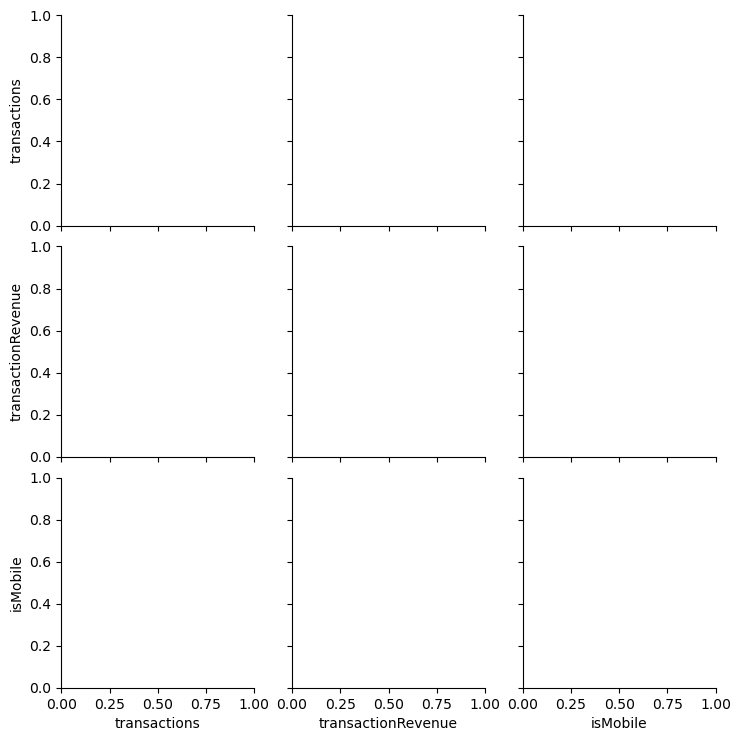

In [22]:
# create pairplot
p = sns.pairplot(pairplot_sub)

## Create categorical plot

In [24]:
purchase['transactionRevenue'].describe().round()

count    36569.0
mean       262.0
std        883.0
min          0.0
25%         41.0
50%         89.0
75%        220.0
max      23130.0
Name: transactionRevenue, dtype: float64

In [37]:
# create transaction revenue lables
purchase.loc[purchase['transactionRevenue'] < 41, 'transactionRevenueRange'] = 'Low price'
purchase.loc[(purchase['transactionRevenue'] >= 41) & (purchase['transactionRevenue'] < 220), 'transactionRevenueRange'] = 'Medium price'
purchase.loc[purchase['transactionRevenue'] >= 220, 'transactionRevenueRange'] = 'High price'

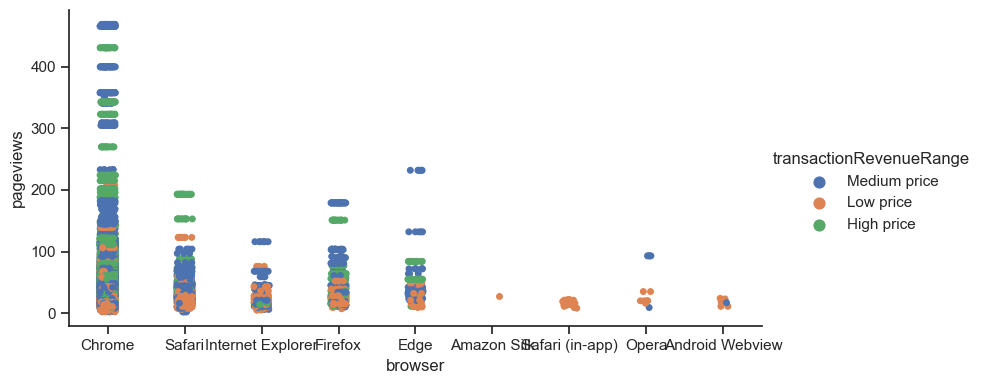

In [42]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="browser", y="pageviews", hue="transactionRevenueRange",height=4, aspect=2,data= purchase)

## Questions

### Does purchase behavior vary across other aspects?

## Hypothesis

### Users' purchase behavior changes across media, adnetworktype, operatingSystem and country.